In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
data.count()

Customer Name          500
Customer e-mail        500
Country                500
Gender                 500
Age                    500
Annual Salary          500
Credit Card Debt       500
Net Worth              500
Car Purchase Amount    500
dtype: int64

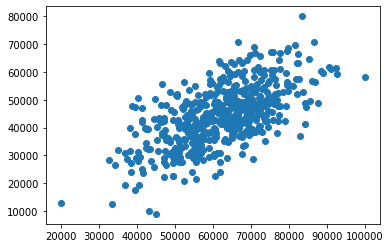

In [4]:
plt.scatter(data['Annual Salary'], data['Car Purchase Amount'])

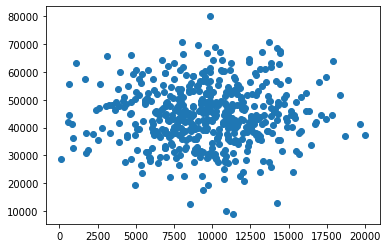

In [5]:
plt.scatter(data['Credit Card Debt'], data['Car Purchase Amount'])

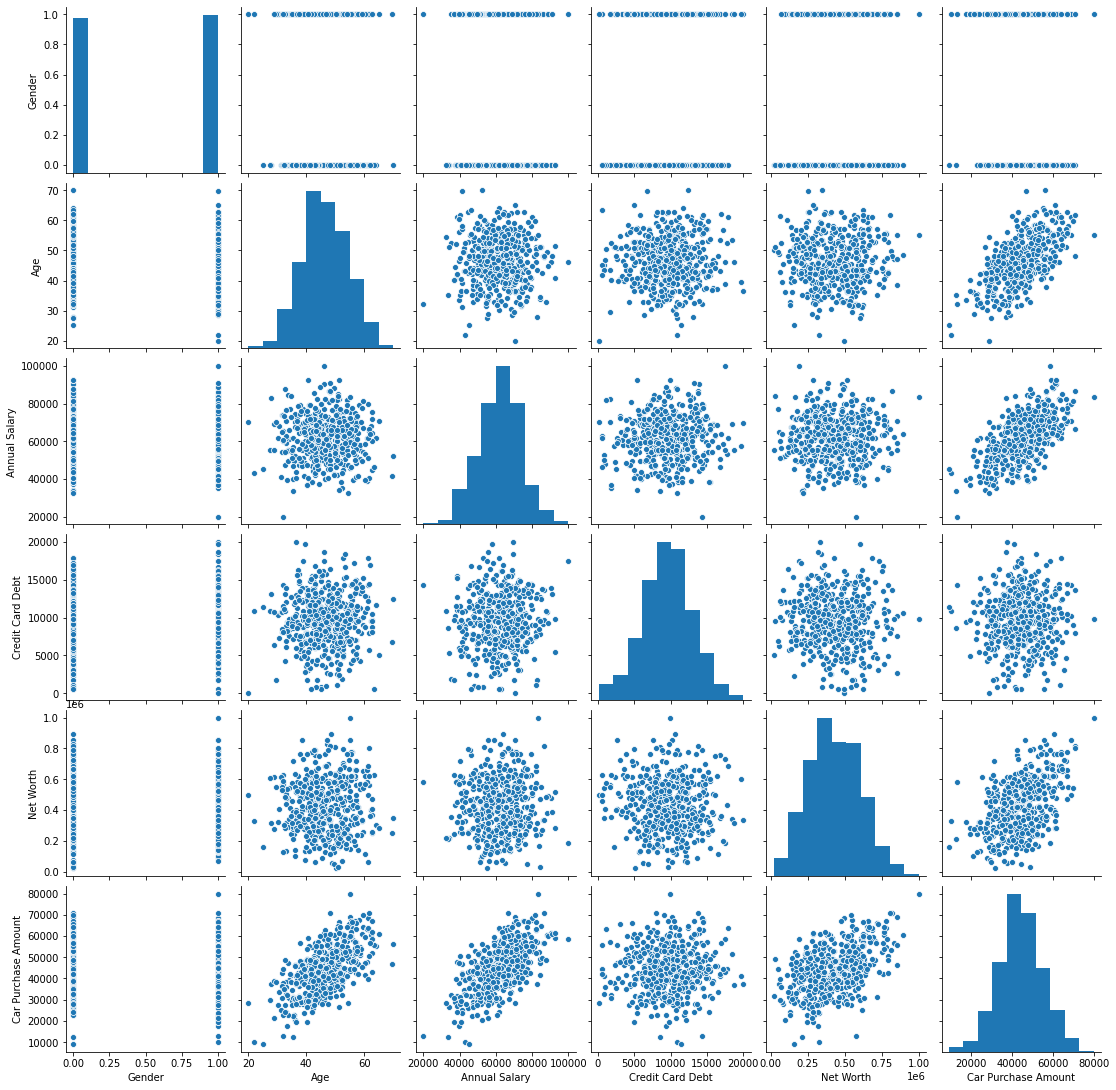

In [6]:
sns.pairplot(data)

In [7]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [8]:
x = data.drop(['Customer Name', 'Customer e-mail', 'Country','Car Purchase Amount'], axis = 1)

In [9]:
x

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [10]:
y = data['Car Purchase Amount']

In [11]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [12]:
y.shape

(500,)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
x_scaler = MinMaxScaler()

In [15]:
scaled_x = x_scaler.fit_transform(x)

In [16]:
scaled_x

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [17]:
y.shape

(500,)

In [18]:
y = y.values.reshape(-1,1)

In [19]:
y.shape

(500, 1)

In [20]:
scaled_y = x_scaler.fit_transform(y)

In [21]:
scaled_y

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size = 0.25)

In [23]:
x_train.shape

(375, 5)

In [24]:
x_test.shape

(125, 5)

In [25]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
epochs_hist = model.fit(x_train, y_train, epochs=10, batch_size=75,  verbose=1, validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 0s 55ms/step - loss: 0.3133 - val_loss: 0.2239
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 0.1981 - val_loss: 0.1279
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.1075 - val_loss: 0.0595
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0477 - val_loss: 0.0218
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0177 - val_loss: 0.0120
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 0.0119 - val_loss: 0.0184
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0181 - val_loss: 0.0248
Epoch 8/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0215 - val_loss: 0.0237
Epoch 9/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0184 - val_loss: 0.0176
Epoch 10/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0135 - val_loss: 0.0128


In [28]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


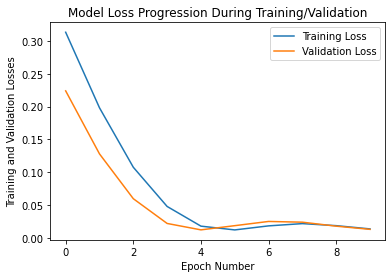

In [29]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [30]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth 

# ***(Note that input data must be normalized)***

X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
#X_test_sample = np.array([[1, 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

y_predict_sample = model.predict(X_test_sample)

print('Expected Purchase Amount=', y_predict_sample)
y_predict_sample_orig = x_scaler.inverse_transform(y_predict_sample)
print('Expected Purchase Amount=', y_predict_sample_orig)

Expected Purchase Amount= [[0.505532]]
Expected Purchase Amount= [[44892.773]]


In [31]:
x.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [39]:
x_sample = np.array([[1,25,7000, 2000, 25000]])
y_pred = model.predict(x_sample)

In [40]:
y_pred

array([[7220.3125]], dtype=float32)